In [1]:
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
import pandas as pd
import numpy as np

## Esercizio 3

1. Quanti casi contiene il dataset?

In [20]:
cars = pd.read_csv('mtcars.txt', sep='\t', decimal=',')
cars
#len(cars)

,modello,consumo,cilindrata,peso,test400metri,trasmissione,marce
0,Mazda RX4,21.00,110,2.620,16.46,1,4
1,Mazda RX4 Wag,21.00,110,2.875,17.02,1,4
2,Datsun 710,22.80,93,2.320,18.61,1,4
3,Hornet 4 Drive,21.40,110,3.215,19.44,0,3
4,Hornet Sportabout,18.70,175,3.440,17.02,0,3
5,Valiant,18.01,105,3.460,20.22,0,3
6,Duster 360,14.30,245,3.570,15.84,0,3
7,Merc 240D,24.40,62,3.190,20.00,0,4
8,Merc 230,22.80,95,3.150,22.90,0,4
9,Merc 280,19.20,123,3.440,18.30,0,4


2. Box plot di cilindrata

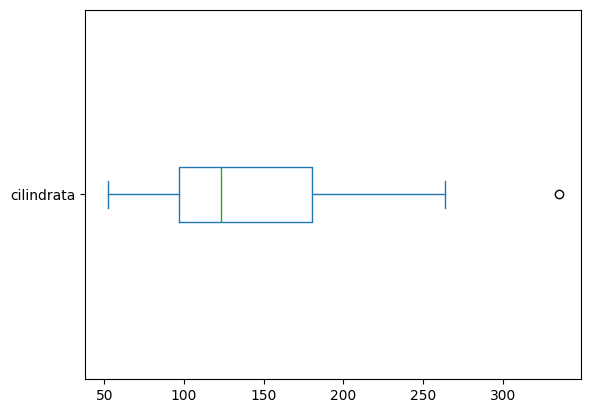

In [6]:
cars.cilindrata.plot.box(vert=False)
plt.show()

3. Modelli di auto che sono outliers rispetto alla cilindrata?

In [8]:
outliers = cars[cars['cilindrata'] > 300]
outliers.modello

30    Maserati Bora
Name: modello, dtype: object

4. Quartili di cilindrata

In [13]:
for i in range(0,5):
    print(f'Quartile di livello {i}: {cars.cilindrata.quantile(0.25*i)}')

Quartile di livello 0: 52.0
Quartile di livello 1: 96.5
Quartile di livello 2: 123.0
Quartile di livello 3: 180.0
Quartile di livello 4: 335.0


5. Distanza interquartile di cilindrata

In [14]:
print(cars.cilindrata.quantile(0.75)-cars.cilindrata.quantile(0.25))

83.5


6. Grafico che rappresenta bene cilindrata

cilindrata è un attributo di tipo quantitativo discreto, per cui la rappresentazione grafica più appropriata è un grafico a barre


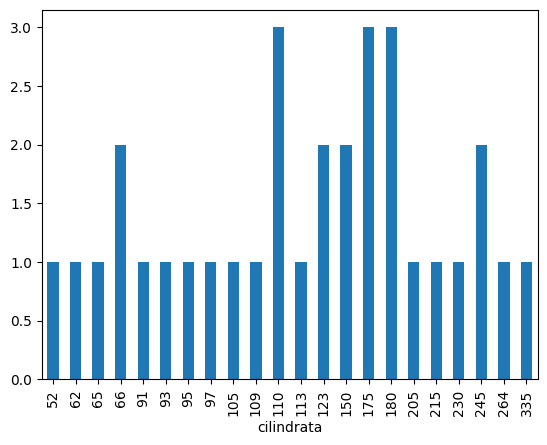

In [18]:
print('cilindrata è un attributo di tipo quantitativo discreto, per cui la rappresentazione grafica più appropriata è un grafico a barre')
cars.cilindrata.value_counts().sort_index().plot.bar()
plt.show()

## Esercizio 4

1. Vi è correlazione tra numero di cilindri e cilindrata?

In [21]:
print('Quali cilindri PD')


Quali cilindri PD


2 e 3 richiedono risultati del punto precedente, non ci sono i cilindri quindi boh

## Esercizio 5

1. 2. Media e deviazione standard di cilindrata

In [22]:
print(f'Media: {cars.cilindrata.mean()}\nDeviazione standard: {cars.cilindrata.std()}')

Media: 146.6875
Deviazione standard: 68.56286848932059


3. Generare un campione casuale di 32 elementi estratto da una normale di parametri trovati nei due punti precedenti.

In [38]:
Z = st.norm(cars.cilindrata.mean(), cars.cilindrata.std())

valoriSimulati = Z.rvs(size=32)
valoriSimulati

array([217.12979623,   8.44919954, 117.82741355, 114.54717973,
       147.00859567, 113.15787489, 154.72933038,   4.04957629,
       275.32211402, 261.188491  , 142.57121005, 134.88134424,
        82.82456904, 127.780129  , 180.06269141, 123.63371921,
       105.44878995, 188.51134579,  99.13815974, 210.66698835,
       -36.13771326, 200.98615688, 241.55594468, 115.41313967,
       110.51519691,  99.81076784,  38.34266621, 159.4011528 ,
       276.0607934 , 161.42329709, -26.53401406, -41.3089706 ])

4. Tracciare diagramma di dispersione tra cilindrata e i valori simulati

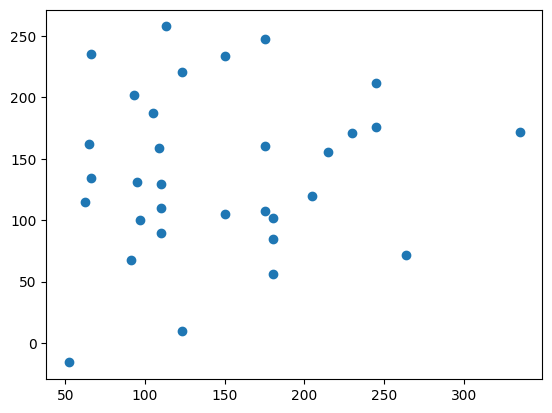

In [33]:
plt.scatter(cars.cilindrata, valoriSimulati)
plt.show()

5. Ordinate in ordine crescente valoriSimulati e salvate il risultato in una nuova variabile

In [46]:
valoriSimulatiSorted = np.sort(valoriSimulati)
print(valoriSimulatiSorted)

[-41.3089706  -36.13771326 -26.53401406   4.04957629   8.44919954
  38.34266621  82.82456904  99.13815974  99.81076784 105.44878995
 110.51519691 113.15787489 114.54717973 115.41313967 117.82741355
 123.63371921 127.780129   134.88134424 142.57121005 147.00859567
 154.72933038 159.4011528  161.42329709 180.06269141 188.51134579
 200.98615688 210.66698835 217.12979623 241.55594468 261.188491
 275.32211402 276.0607934 ]


6. Ordinare i valori di cilindrata in ordine crescente e salvate il risulato in cilindrateSorted

In [50]:
cilindrateSorted = cars.cilindrata.sort_values()
cilindrateSorted

18     52
7      62
19     65
25     66
17     66
26     91
2      93
8      95
20     97
5     105
31    109
0     110
1     110
3     110
27    113
10    123
9     123
21    150
22    150
29    175
24    175
4     175
12    180
13    180
11    180
14    205
15    215
16    230
23    245
6     245
28    264
30    335
Name: cilindrata, dtype: int64

7. Tracciate il diagramma di dispersione di valoriSimulatiSorted e cilindrateSorted

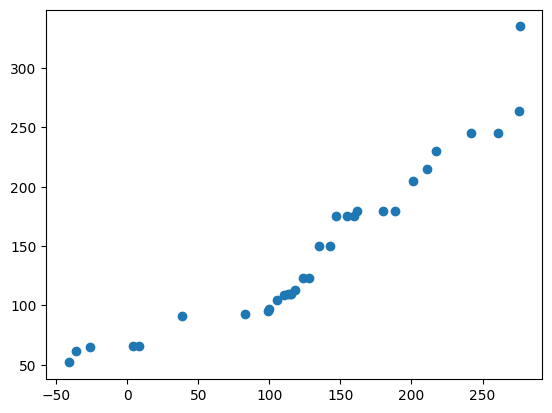

In [51]:
plt.scatter(valoriSimulatiSorted, cilindrateSorted)
plt.show()

8.1 Cilindrata segue una legge normale?

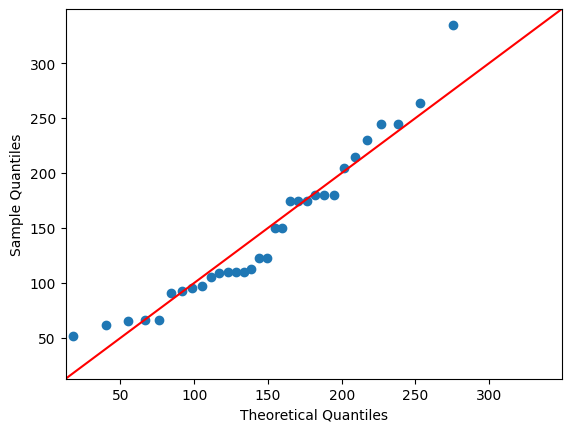

Guardando il qqplot si vede come la maggior parte dei punti non si adagia bene sulla diagonale, per cui possiamo dire che cilindrata non segue una legge normale
146.6875 68.56286848932059


In [53]:
sm.qqplot(cars.cilindrata, dist = st.norm(cars.cilindrata.mean(), cars.cilindrata.std()), line="45")
plt.show()
print('Guardando il qqplot si vede come la maggior parte dei punti non si adagia bene sulla diagonale, per cui possiamo dire che cilindrata non segue una legge normale')


8.2 Esiste una relazione lineare tra cilindrata e valori simulati?

In [56]:
print(f'Guardando lo scatter plot costruito in precedenza, si nota come esiste una relazione lineare di tipo diretto tra i due attributi. Inoltre l indice di correlazione lineare {pd.Series.corr(cilindrateSorted, pd.SeriesvaloriSimulatiSorted)} vicino ad 1 conferma tale ipotesi.')

TypeError: unsupported type: <class 'numpy.ndarray'>

## Esercizio 6

1. Grafico opportuno per trasmissione

Trasmissione è un attributo di tipo quantitativo binario, per cui una rappresentazione appropriata è un aerogramma.


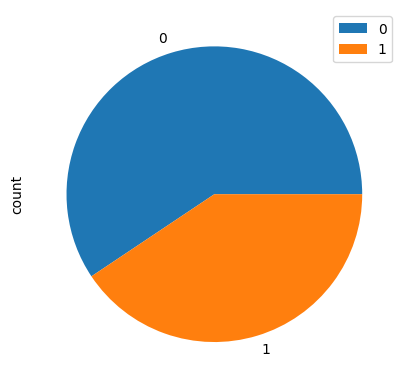

In [61]:
print('Trasmissione è un attributo di tipo quantitativo binario, per cui una rappresentazione appropriata è un aerogramma.')
cars.trasmissione.value_counts().plot.pie(legend=True)
plt.show()

2. I valori di trasmissione sono estratti da X = tipo di trasmissione. Che legge segue la variabile aleatoria X?

In [62]:
print('Poichè X può assumere solo due valori possibili, possiamo dire che segue una legge bernoulliana dove X = 1 se la trasmissione è manuale, 0 se è automatica')

Poichè X può assumere solo due valori possibili, possiamo dire che segue una legge bernoulliana dove X = 1 se la trasmissione è manuale, 0 se è automatica


Supponiamo che il campione casuale sia ben rappresentativo della popolazione

3. Stimate il valore atteso di X

In [63]:
cars.trasmissione.mean()

0.40625

4. Lo stimatore proposto prima è non distorto?

In [64]:
print('Lo stimatore usato prima è la media campionaria, che è sempre uno stimatore non distorto per il valore atteso della popolazione ed è anche consistente in media quadratica.')

Lo stimatore usato prima è la media campionaria, che è sempre uno stimatore non distorto per il valore atteso della popolazione ed è anche consistente in media quadratica.


5. Taglia del campione

In [65]:
len(cars.trasmissione.dropna())

32

6. Tabella frequenze assolute di trasmissione

In [66]:
trasmissione_abs = pd.crosstab(cars.trasmissione, columns=['Abs. frequence'], colnames=[''])
trasmissione_abs

,Abs. frequence
trasmissione,
0,19
1,13


7. Probabilità che un auto abbia trasmissione automatica

In [68]:
len(cars[cars['trasmissione'] == 1])/len(cars.trasmissione)

0.40625

10. sia a = 0.85. Determinare l'errore massimo fatto con probabilità >= ad a nella stima del valore atteso di X

In [71]:
import math
Z = st.norm(0,1)

a = cars.trasmissione.std()/math.sqrt(len(cars.trasmissione.dropna()))

print(a*Z.ppf(1-(0.15/2)))

0.12698102114579055
